<a href="https://colab.research.google.com/github/Anky597/loan-prediction/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/train_data.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
test = pd.read_csv('/content/test_data.csv')
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
print('Gender Mode: ', df['Gender'].mode())
print('Married  Mode: ', df['Married'].mode())
print('Self_Employed Mode: ', df['Self_Employed'].mode())
print('Credit_History Mode: ', df['Credit_History'].mode())

Gender Mode:  0    Male
Name: Gender, dtype: object
Married  Mode:  0    Yes
Name: Married, dtype: object
Self_Employed Mode:  0    No
Name: Self_Employed, dtype: object
Credit_History Mode:  0    1.0
Name: Credit_History, dtype: float64


<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

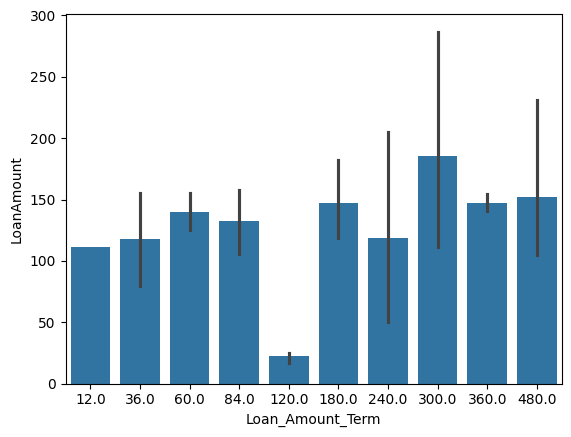

In [18]:
# creating bar plot
sns.barplot(x = df['Loan_Amount_Term'], y = df['LoanAmount'])

In [19]:
#checking null values
df[['Loan_Amount_Term', 'LoanAmount']][df['Loan_Amount_Term'].isnull()]

,Loan_Amount_Term,LoanAmount
19,NaN,115.0
36,NaN,100.0
44,NaN,96.0
45,NaN,88.0
73,NaN,95.0
112,NaN,152.0
165,NaN,182.0
197,NaN,120.0
223,NaN,175.0
232,NaN,120.0


In [20]:
#calulating number of dependatna on application
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [21]:
#Value Substitution
df['Dependents'].replace('3+',3,inplace = True)
df['Dependents'].value_counts()

,count
Dependents,
0,345
1,102
2,101
3,51


In [22]:
df[['Dependents', 'Married']][df['Dependents'].isnull()]

,Dependents,Married
102,NaN,Yes
104,NaN,NaN
120,NaN,Yes
226,NaN,Yes
228,NaN,NaN
293,NaN,No
301,NaN,Yes
332,NaN,No
335,NaN,Yes
346,NaN,Yes


In [23]:
#Missing value imputation
df['Gender'].fillna('Male', inplace = True)
df['Married'].fillna('Yes', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['Credit_History'].fillna('1.0', inplace = True)
df['LoanAmount'].fillna((df['LoanAmount'].mean()), inplace = True)
df['Loan_Amount_Term'].fillna('84', inplace = True)
df['Dependents'].fillna(0, inplace = True)

In [24]:
#DataType conversion to int
df['Dependents'] = df['Dependents'].astype('int')
df['Dependents'].dtype

dtype('int64')

In [25]:
#checking for the missing values
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [26]:
#column droping
df.drop('Loan_ID', axis = 1, inplace = True)

In [27]:
#unique values in each column
df.nunique()

,0
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,204
Loan_Amount_Term,11
Credit_History,3


In [28]:
#stats. summery of dataset
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162
std,1.009623,6109.041673,2926.248369,84.037468
min,0.000000,150.000000,0.000000,9.000000
25%,0.000000,2877.500000,0.000000,100.250000
50%,0.000000,3812.500000,1188.500000,129.000000
75%,1.000000,5795.000000,2297.250000,164.750000
max,3.000000,81000.000000,41667.000000,700.000000


<Figure size 1000x400 with 0 Axes>

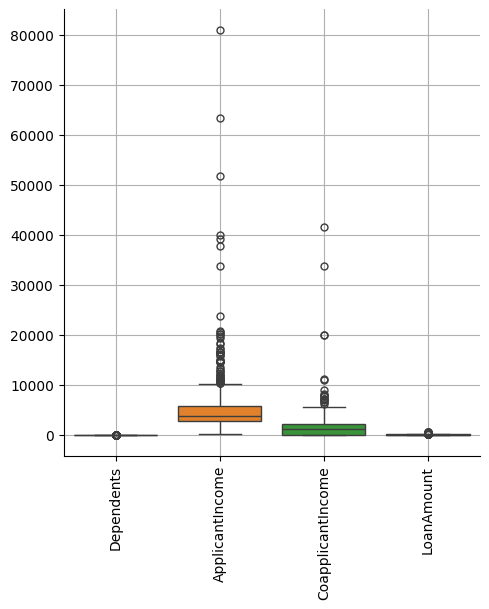

In [29]:
#visualisation of data set
plt.figure(figsize = (10,4))
sns.catplot(data = df, kind = 'box')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

<Axes: xlabel='Education', ylabel='count'>

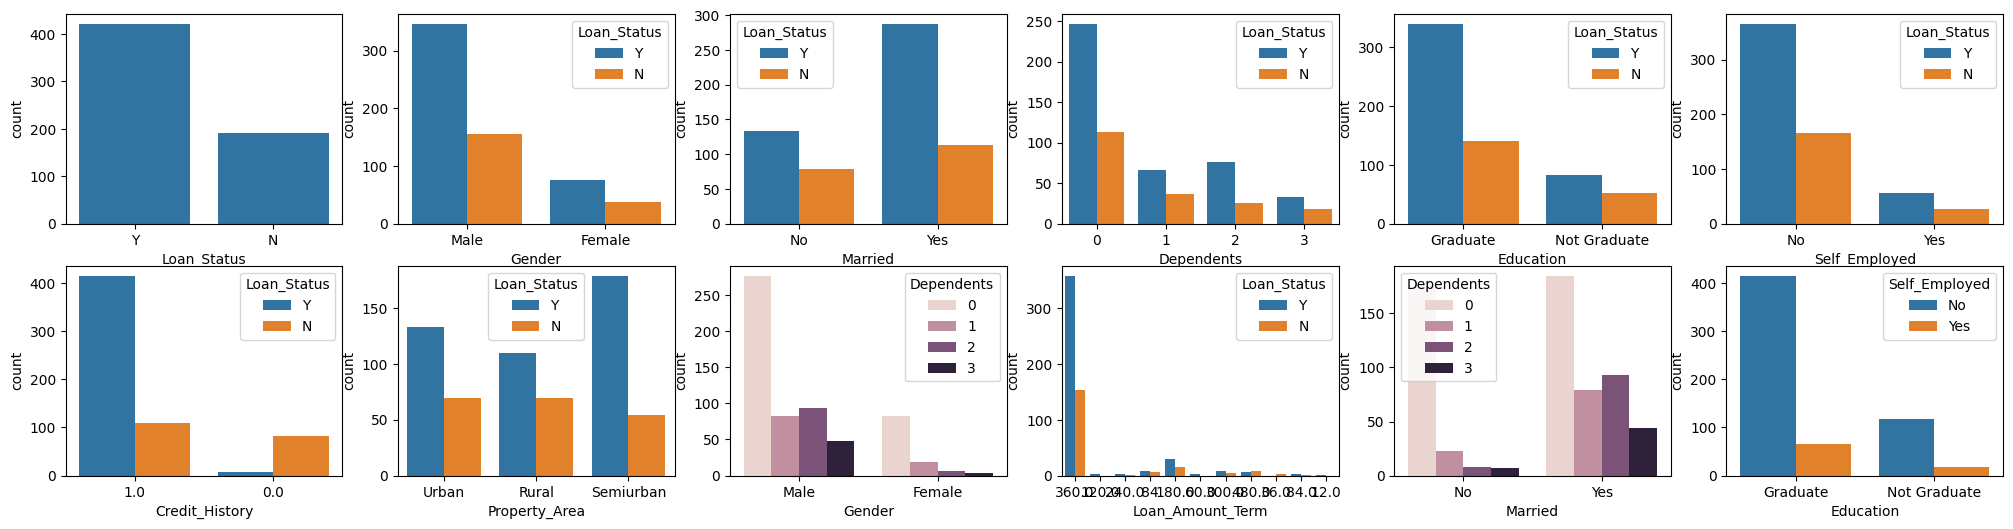

In [30]:
#ploting the possible frequency plot

fig, axs = plt.subplots(figsize = (25,6), ncols = 6, nrows = 2)
sns.countplot(x = df['Loan_Status'], ax = axs[0,0])
sns.countplot(x = df['Gender'], hue = df['Loan_Status'], ax = axs[0,1])
sns.countplot(x = df['Married'], hue = df['Loan_Status'], ax = axs[0,2])
sns.countplot(x = df['Dependents'], hue = df['Loan_Status'], ax = axs[0,3])
sns.countplot(x = df['Education'], hue = df['Loan_Status'], ax = axs[0,4])
sns.countplot(x = df['Self_Employed'], hue = df['Loan_Status'], ax = axs[0,5])

sns.countplot(x = df['Credit_History'], hue = df['Loan_Status'], ax = axs[1,0])
sns.countplot(x = df['Property_Area'], hue = df['Loan_Status'], ax = axs[1,1])
sns.countplot(x = df['Gender'], hue = df['Dependents'], ax = axs[1,2])
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'], ax = axs[1,3])
sns.countplot(x = df['Married'], hue = df['Dependents'], ax = axs[1,4])
sns.countplot(x = df['Education'], hue = df['Self_Employed'], ax = axs[1,5])

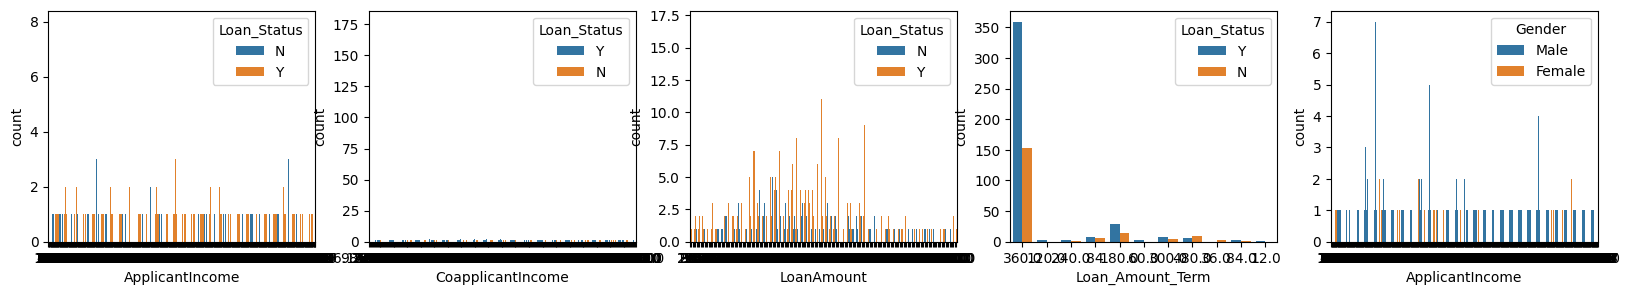

In [31]:
fig, axs = plt.subplots(figsize = (20,3), ncols = 5)
sns.countplot(x = df['ApplicantIncome'], hue = df['Loan_Status'], fill = True ,ax = axs[0])
sns.countplot(x = df['CoapplicantIncome'], hue = df['Loan_Status'], fill = True ,ax = axs[1])
sns.countplot(x = df['LoanAmount'], hue = df['Loan_Status'], fill = True ,ax = axs[2])
sns.countplot(x = df['Loan_Amount_Term'], hue = df['Loan_Status'], fill = True ,ax = axs[3])
sns.countplot(x = df['ApplicantIncome'], hue = df['Gender'], fill = True ,ax = axs[4])
plt.show()

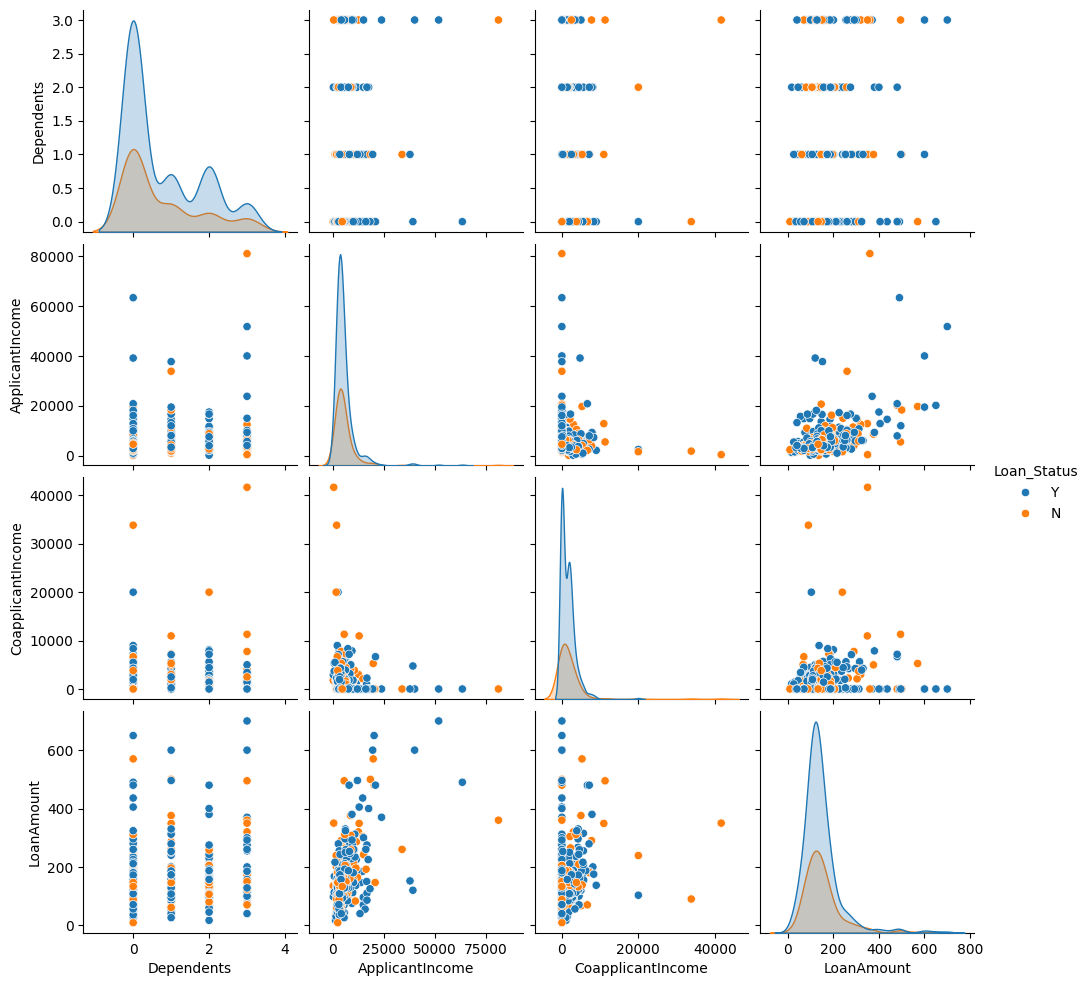

In [32]:
#pair plot
sns.pairplot(df, hue = 'Loan_Status')

In [33]:
#checking column datatype
obj_col = df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [34]:
#converitng non-numerical data to numerical data
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[obj_col] = df[obj_col].astype(str)
df[obj_col] = oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0


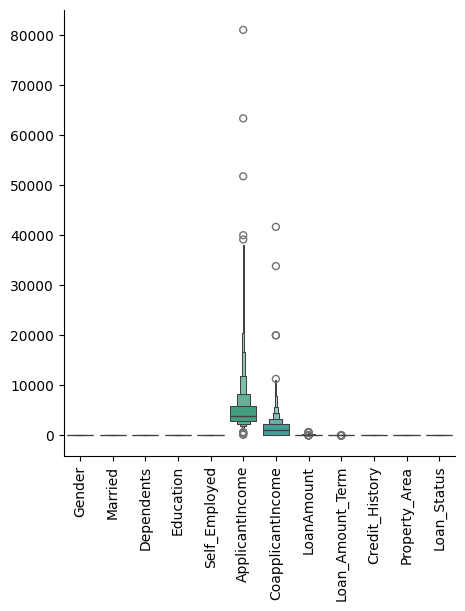

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,5.739414,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,1.325067,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,6.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,6.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,6.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,10.000000,1.000000,2.000000,1.000000


In [35]:
data = df
sns.catplot(data = df, kind = 'boxen')
plt.xticks(rotation = 90)
plt.show()
df.describe()

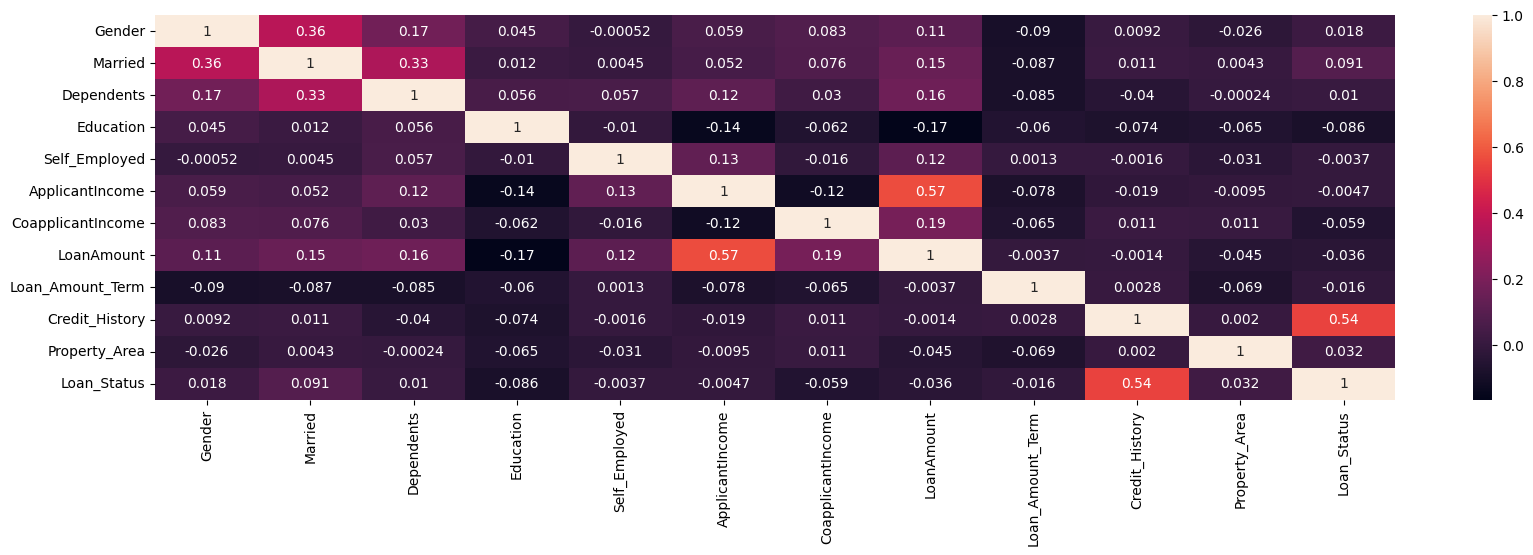

In [36]:
#creating heat map
plt.figure(figsize = (20,5))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [37]:
#Standardization of data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


In [38]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298


In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 4, test_size = 0.25, stratify = y)

In [40]:
#Making Machine Learning Model that fits and evaluates on training and testing data
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train_accuracy = model.score(xtrain,ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(ytest,ypred), "\nClassification Report: \n", classification_report(ytest, ypred), '\nConfusion Matrix: \n', confusion_matrix(ytest, ypred))
    print(f'Training Accuracy: {train_accuracy}\nTesting Accuracy: {test_accuracy}')
    print()
    print()
    return model

In [41]:
#Importing Libraries foe Accuracy score, Confusion Matrix and Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = mymodel(KNeighborsClassifier())

KNeighborsClassifier Accuracy
Accuracy:  0.8246753246753247 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.52      0.65        48
         1.0       0.82      0.96      0.88       106

    accuracy                           0.82       154
   macro avg       0.84      0.74      0.77       154
weighted avg       0.83      0.82      0.81       154
 
Confusion Matrix: 
 [[ 25  23]
 [  4 102]]
Training Accuracy: 0.8217391304347826
Testing Accuracy: 0.8246753246753247




In [43]:
#svm model
from sklearn.svm import SVC
svc = mymodel(SVC())

SVC Accuracy
Accuracy:  0.8246753246753247 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154
 
Confusion Matrix: 
 [[ 21  27]
 [  0 106]]
Training Accuracy: 0.8108695652173913
Testing Accuracy: 0.8246753246753247




In [44]:
#using decision tree model
from sklearn.tree import DecisionTreeClassifier
dt= mymodel(DecisionTreeClassifier())

DecisionTreeClassifier Accuracy
Accuracy:  0.7597402597402597 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.65      0.50      0.56        48
         1.0       0.79      0.88      0.83       106

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154
 
Confusion Matrix: 
 [[24 24]
 [13 93]]
Training Accuracy: 1.0
Testing Accuracy: 0.7597402597402597




In [45]:
#using logistic regression model
from sklearn.linear_model import LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy
Accuracy:  0.8376623376623377 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        48
         1.0       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154
 
Confusion Matrix: 
 [[ 23  25]
 [  0 106]]
Training Accuracy: 0.8043478260869565
Testing Accuracy: 0.8376623376623377




In [46]:
# Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = mymodel(GaussianNB())

GaussianNB Accuracy
Accuracy:  0.8311688311688312 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.96      0.48      0.64        48
         1.0       0.81      0.99      0.89       106

    accuracy                           0.83       154
   macro avg       0.88      0.73      0.76       154
weighted avg       0.85      0.83      0.81       154
 
Confusion Matrix: 
 [[ 23  25]
 [  1 105]]
Training Accuracy: 0.8021739130434783
Testing Accuracy: 0.8311688311688312




In [47]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rfc = mymodel(RandomForestClassifier(n_estimators = 80, max_depth = 10, min_samples_leaf = 12))

RandomForestClassifier(max_depth=10, min_samples_leaf=12, n_estimators=8 Accuracy
Accuracy:  0.8376623376623377 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        48
         1.0       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154
 
Confusion Matrix: 
 [[ 23  25]
 [  0 106]]
Training Accuracy: 0.8
Testing Accuracy: 0.8376623376623377




In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


The best model is: LogisticRegression()


In [50]:
# Example batch input (each row is an applicant's data)
batch_input = np.array([
    [1, 1, 0, 1, 0, 5000, 0, 150, 360, 1, 1],  # Applicant 1
    [0, 0, 2, 0, 1, 6000, 1500, 200, 360, 1, 2]  # Applicant 2
])

batch_prediction = rfc.predict(batch_input)

# Print predictions
for i, pred in enumerate(batch_prediction):
    print(f"Applicant {i+1}: {'Loan Approved' if pred == 1 else 'Loan Not Approved'}")


Applicant 1: Loan Approved
Applicant 2: Loan Approved


In [51]:
import pickle

# Assuming `best_model` is the model you have selected as the best one
#best_model_1 = best_model # Replace `rfc` with your best model variable

# Define the filename for the exported model
filename = 'best_model.pkl'

# Export the best model using pickle
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model exported successfully as {filename}")


Model exported successfully as best_model.pkl


In [54]:
#using the Explanable Ai using SHAP for random forest classifier
!pip install shap
import shap
import numpy as np
import pandas as pd


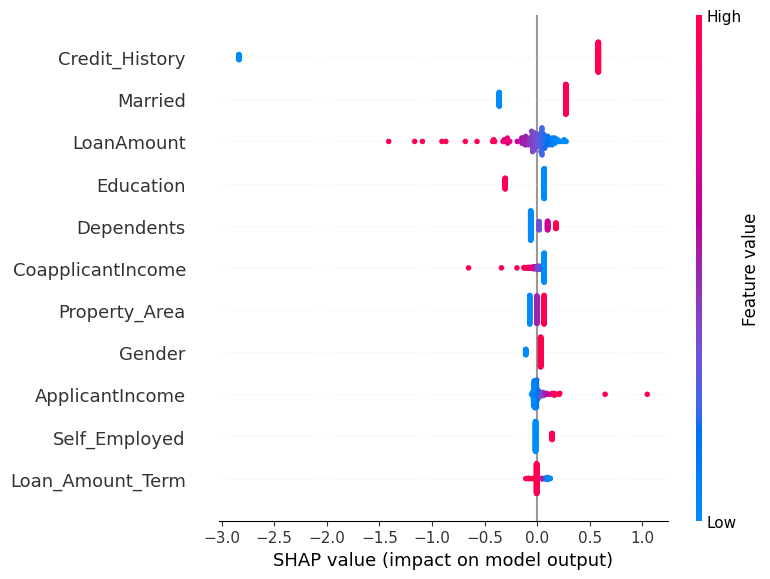

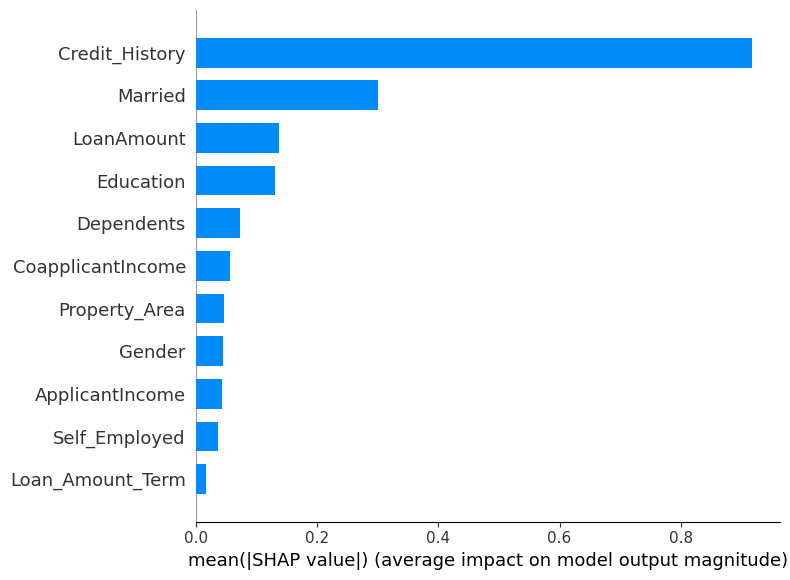

In [55]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Assuming best_model is already trained on the data
# and xtrain, xtest, ytrain, ytest are already defined.

# Create SHAP explainer for Logistic Regression
explainer = shap.LinearExplainer(best_model, xtrain, feature_perturbation="interventional")

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(xtest)

# Summarize the effects of all the features
shap.summary_plot(shap_values, xtest, feature_names=xtrain.columns)

# Plot a single sample SHAP force plot
sample_index = 0  # You can change this index to analyze a different instance
shap.force_plot(explainer.expected_value, shap_values[sample_index], xtest.iloc[sample_index], feature_names=xtrain.columns)

# If you want to check the most impactful features on a global level
shap.summary_plot(shap_values, xtest, plot_type="bar", feature_names=xtrain.columns)

# Optional: Visualize interaction between two features
# shap.dependence_plot("ApplicantIncome", shap_values, xtest, interaction_index="LoanAmount")


Accuracy: 0.8376623376623377
Classification Report: 
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        48
         1.0       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg       0.90      0.74      0.77       154
weighted avg       0.87      0.84      0.82       154

Confusion Matrix: 
[[ 23  25]
 [  0 106]]


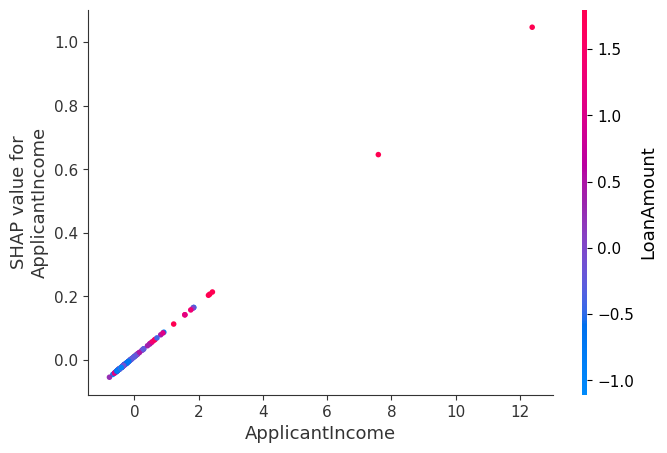

In [56]:
# Import necessary libraries
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'x' is your dataset and 'y' is your target variable
# Perform the train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=4, test_size=0.25, stratify=y)

# Train Logistic Regression model
best_model = LogisticRegression()
best_model.fit(xtrain, ytrain)

# Make predictions on the test set
ypred = best_model.predict(xtest)

# Print model performance
print(f'Accuracy: {accuracy_score(ytest, ypred)}')
print(f'Classification Report: \n{classification_report(ytest, ypred)}')
print(f'Confusion Matrix: \n{confusion_matrix(ytest, ypred)}')

# Create SHAP explainer for the Logistic Regression model
explainer = shap.LinearExplainer(best_model, xtrain, feature_perturbation="interventional")

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(xtest)

# Visualize SHAP interaction between two features
# Example: Interaction between 'ApplicantIncome' and 'LoanAmount'
shap.dependence_plot("ApplicantIncome", shap_values, xtest, interaction_index="LoanAmount")

# If you want to explore other feature interactions, simply replace the feature names:
# shap.dependence_plot("Credit_History", shap_values, xtest, interaction_index="Loan_Amount_Term")

# Display the plot
plt.show()


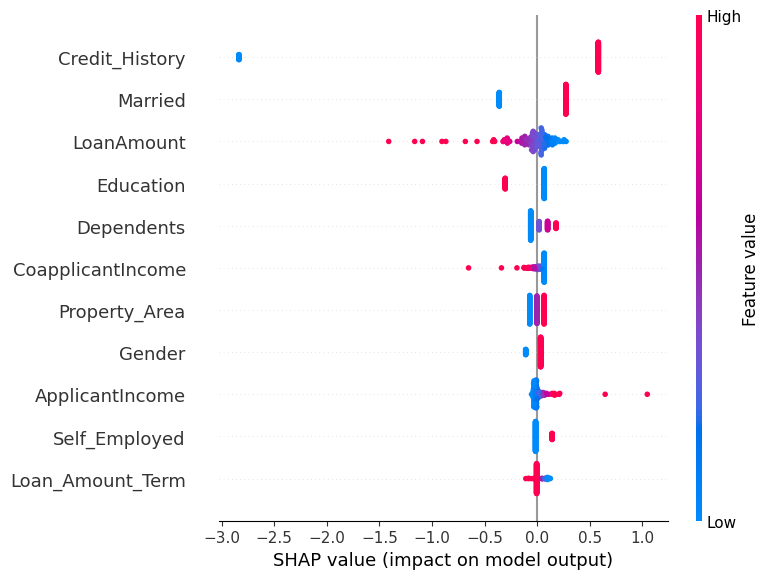

In [57]:
# Summary plot
shap.summary_plot(shap_values, xtest, feature_names=x.columns)


In [58]:
# Force plot for a single prediction (e.g., the first test data point)
shap.force_plot(explainer.expected_value, shap_values[0], xtest.iloc[0], feature_names=x.columns)



In [59]:
# Force plot for the entire test dataset
shap.force_plot(explainer.expected_value, shap_values, xtest, feature_names=x.columns)


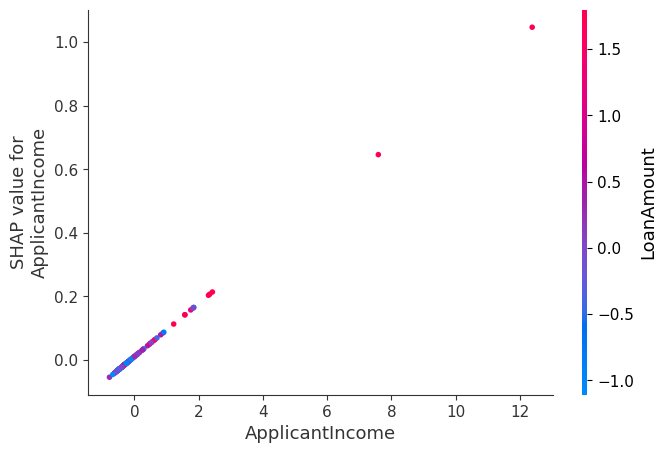

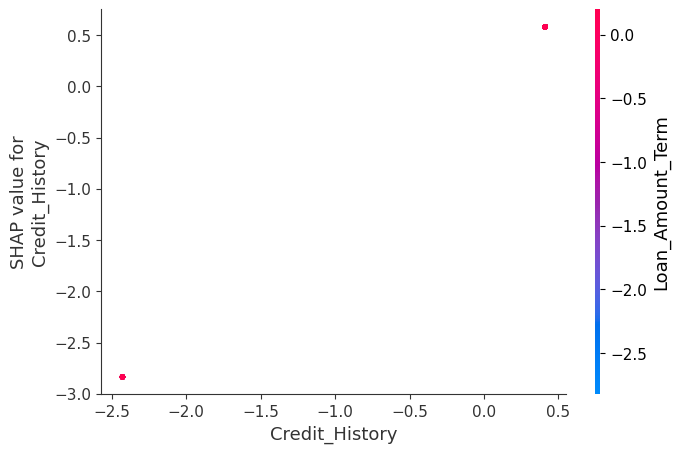

In [60]:
# Example: Interaction between 'ApplicantIncome' and 'LoanAmount'
shap.dependence_plot("ApplicantIncome", shap_values, xtest, interaction_index="LoanAmount")

# Example: Interaction between 'Credit_History' and 'Loan_Amount_Term'
shap.dependence_plot("Credit_History", shap_values, xtest, interaction_index="Loan_Amount_Term")



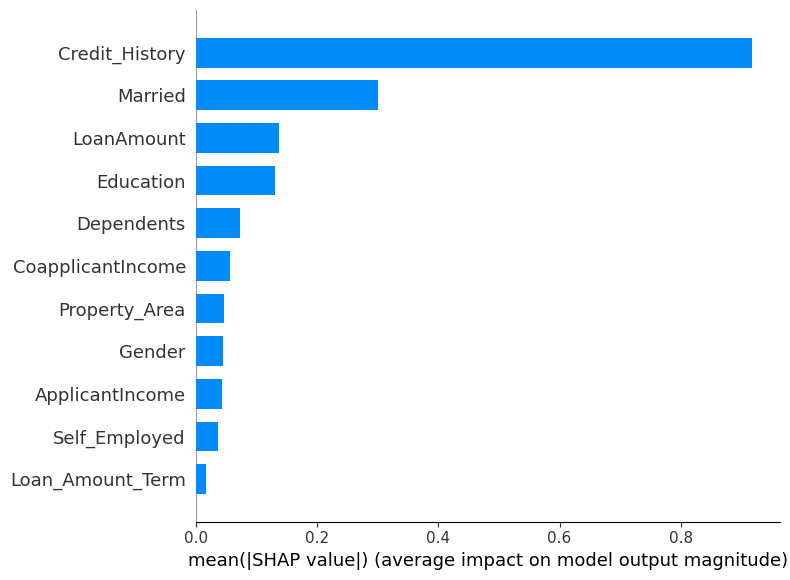

In [61]:
# Bar plot to show the mean absolute SHAP values for each feature
shap.summary_plot(shap_values, xtest, plot_type="bar", feature_names=x.columns)


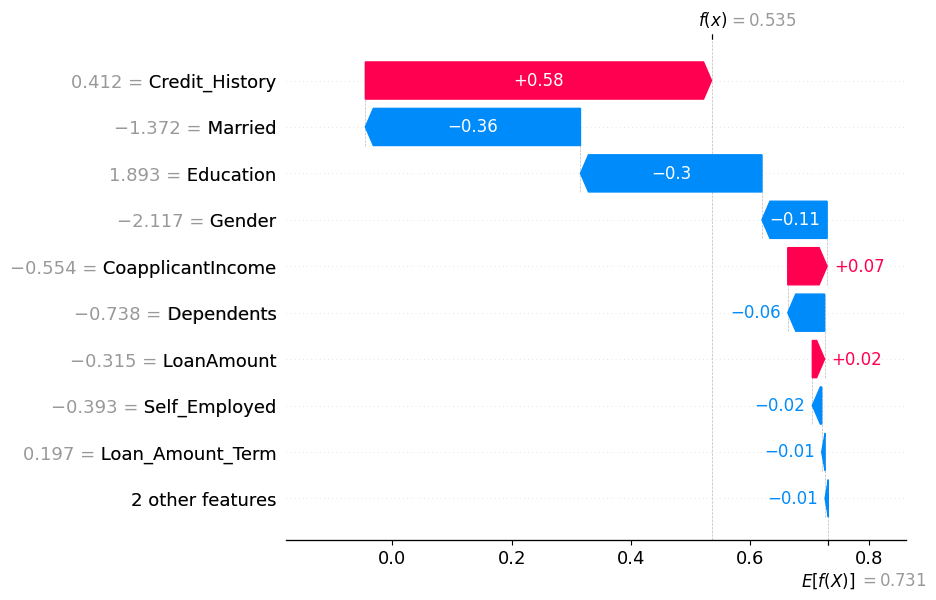

In [65]:
# Create SHAP values using the explainer
shap_values = explainer.shap_values(xtest)

# Create an Explanation object for a specific instance (e.g., the first instance in the test set)
shap_exp = shap.Explanation(values=shap_values[0],
                            base_values=explainer.expected_value,
                            data=xtest.iloc[0],
                            feature_names=xtest.columns)

# Waterfall plot for the specific instance
shap.waterfall_plot(shap_exp, max_display=10)  # max_display controls how many features are shown


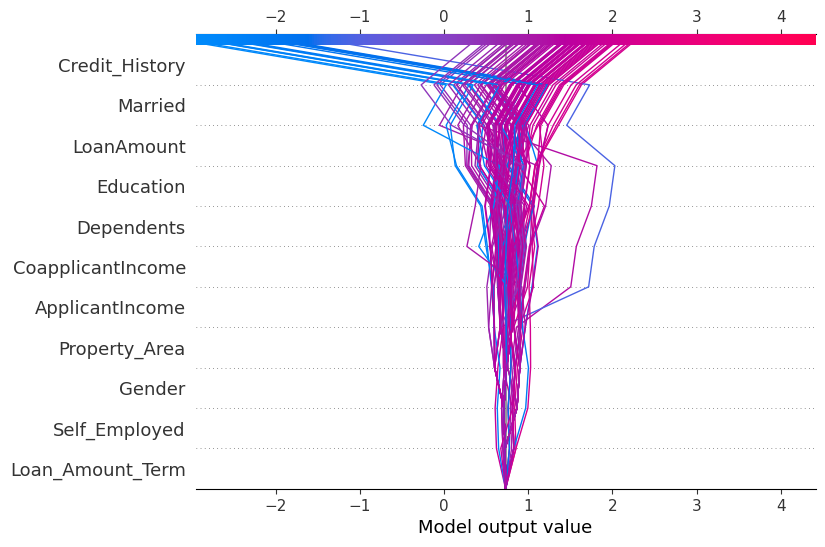

In [69]:

import shap

# Calculating the  SHAP values for the test set
shap_values = explainer.shap_values(xtest)
if isinstance(shap_values, list):
    # Assuming binary classification and focusing on class 1
    shap_values_for_class = shap_values[1]
    expected_value = explainer.expected_value[1]
else:
    # For regression or single output classification
    shap_values_for_class = shap_values
    expected_value = explainer.expected_value
feature_names = xtest.columns.tolist()
shap.decision_plot(
    base_value=expected_value,
    shap_values=shap_values_for_class[:100],
    features=xtest.iloc[:100],
    feature_names=feature_names
)


In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'model' is your trained model (e.g., best_model from your previous code)
# And assuming 'scaler' is the StandardScaler used to scale your input features (if applicable)

# Example input values
input_data = {
    'Gender': [0],  # Example values, e.g., 0 for male, 1 for female
    'Married': [1],  # Example values, e.g., 0 for not married, 1 for married
    'Dependents': [1],  # Number of dependents
    'Education': [0],  # Example values, e.g., 0 for graduate, 1 for not graduate
    'Self_Employed': [0],  # Example values, e.g., 0 for not self-employed, 1 for self-employed
    'ApplicantIncome': [4],  # Example values
    'CoapplicantIncome': [0],  # Example values
    'LoanAmount': [128],  # Example values
    'Loan_Amount_Term': [360],  # Example values
    'Credit_History': [1],  # Example values, e.g., 0 for no credit history, 1 for credit history
    'Property_Area': [2]  # Example values, e.g., 0 for urban, 1 for semiurban, 2 for rural
}

# Convert input data to DataFrame
input_df = pd.DataFrame(input_data)

# If you used scaling or any preprocessing, apply it to the input data
# e.g., if you used StandardScaler
# input_df_scaled = scaler.transform(input_df)

# Make prediction using the trained model
predictions = lr.predict(input_df)  # For classification or regression
# If you want prediction probabilities (for classification models):
# probabilities = model.predict_proba(input_df)

print("Predictions:", predictions)
# If you have probabilities and want to print them
# print("Probabilities:", probabilities)


Predictions: [0.]


In [90]:
# Example batch input (each row is an applicant's data)
batch_input = np.array([
    [0, 1,1,0,0,4583,1508,12855,360,1,0] # Applicant 1

])

batch_prediction = lr.predict(batch_input)
print(f"Applicant: {'Loan Approved' if batch_prediction[0] == 1 else 'Loan Not Approved'}")



Applicant: Loan Not Approved
